In [28]:
# libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import time   
import random

# 정렬 5개(퀵정렬, 선택정렬, 버블정렬, 삽입정렬, 합병정렬)
def QuickSort(array):
  if len(array) < 2:  
    return array
  else:   
    pivot = array[0] 

    less = [] 
    greater = [] 
    for i in array[1:]: 
      if i <= pivot:
        less.append(i)
      else:
        greater.append(i)
    return QuickSort(less) + [pivot] + QuickSort(greater)

# 선택정렬 - find smallest 함수와 합치기 완료
def selection_sort(arr): # 입력값: 배열
    newArr = []
    for i in range(len(arr)):
        smallest = arr[0]
        smallest_index = 0
        for idx in range(1, len(arr)):
            if arr[idx] < smallest:
                smallest = arr[idx]
                smallest_index = idx

        newArr.append(arr.pop(smallest_index))
    return newArr

def BubbleSort(nlist):
    for passnum in range(len(nlist)-1,0,-1):
        for i in range(passnum):
            if nlist[i]>nlist[i+1]:
                temp = nlist[i]
                nlist[i] = nlist[i+1]
                nlist[i+1] = temp
    return nlist

def InsertionSort(InsertionList) :
    for i in range(1,len(InsertionList)) :
        j=i-1
        while(j>=0 and InsertionList[i]<InsertionList[j]):
            j-=1
        InsertionList.insert((j + 1), InsertionList[i])
        del InsertionList[i+1]
    return InsertionList
                
def MergeSort(arr):
    if len(arr) < 2:
        return arr

    mid = len(arr) // 2
    low_arr = MergeSort(arr[:mid])
    high_arr = MergeSort(arr[mid:])

    merged_arr = []
    l = h = 0
    while l < len(low_arr) and h < len(high_arr):
        if low_arr[l] < high_arr[h]:
            merged_arr.append(low_arr[l])
            l += 1
        else:
            merged_arr.append(high_arr[h])
            h += 1
    merged_arr += low_arr[l:]
    merged_arr += high_arr[h:]
    return merged_arr

#여기부터 time calculation func
def time_calculation_quick(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        QuickSort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

def time_calculation_selection(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        #print("Selection sort for {0} start".format(i))
        SelectionSort(copy_list)
        #print("Selection sort for {0} end".format(i))
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

def time_calculation_bubble(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        BubbleSort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

def time_calculation_insertion(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        InsertionSort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

def time_calculation_merge(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        MergeSort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [29]:
# 간선그래프 x축에 해당되는 내용
test_range = []
for exponent in range(1, 6):
    test_range.append(10 ** exponent) #10의1승부터 10의 5승
print("test range=", test_range)

test range= [10, 100, 1000, 10000, 100000]


In [30]:
# 정렬 5개 각각 시간 나타내기
alist = random.sample(range(1,10000000),1000000)

In [31]:
output_quick = time_calculation_quick(test_range)
output_quick

[0.0,
 0.00099945068359375,
 0.001009225845336914,
 0.019004106521606445,
 0.2480473518371582]

In [32]:
output_selection = time_calculation_selection(test_range)
output_selection

[0.0, 0.0, 0.01899576187133789, 2.0444722175598145, 317.8334963321686]

In [33]:
output_bubble = time_calculation_bubble(test_range)
output_bubble

[0.0,
 0.0010001659393310547,
 0.09002041816711426,
 9.326126098632812,
 1094.3875353336334]

In [34]:
output_insertion = time_calculation_insertion(test_range)
output_insertion

[0.0,
 0.0010020732879638672,
 0.02900385856628418,
 2.860649585723877,
 327.11942887306213]

In [35]:
output_merge = time_calculation_merge(test_range)
output_merge

[0.0,
 0.0010004043579101562,
 0.004002809524536133,
 0.05400967597961426,
 0.6411478519439697]

In [36]:
# 간선그래프에서 y축에 해당되는 내용
output_selection = np.random.randn(5)
output_quick = np.random.randn(5)+range(1,6)
output_bubble = np.random.randn(5)
output_insertion = np.random.randn(5)
output_merge = np.random.randn(5)
print(output_selection)

[ 1.11625444 -0.37201627 -1.13117318 -0.89280004 -0.65817451]


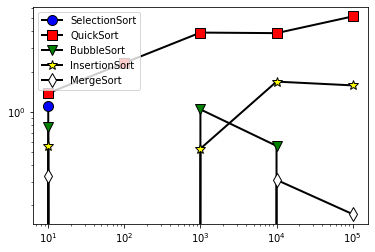

In [37]:
# Data
df =pd.DataFrame({'x': test_range, 'SelectionSort': output_selection, 'QuickSort': output_quick, 'BubbleSort': output_bubble,'InsertionSort': output_insertion, 'MergeSort': output_merge})

# multiple line plot
plt.xscale('log') # x,y 모두 로그 변환
plt.yscale('log')
plt.plot( 'x', 'SelectionSort', data=df, marker='o', markerfacecolor='blue', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'QuickSort', data=df, marker="s", markerfacecolor='red', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'BubbleSort', data=df, marker="v", markerfacecolor='green', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'InsertionSort', data=df, marker="*", markerfacecolor='yellow', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'MergeSort', data=df, marker="d", markerfacecolor='white', markersize=10, color='black', linewidth=2)
# markers' shape all_shape=['.','o','v','^','>','<','s','p','*','h','H','D','d','']

plt.legend()

In [ ]:
"""
quick sort : O(n log n) - at average, O(n) at worst
selection sort : n(n - 1)/2 
insertion sort:  n(n - 1)/2 (worst)
merge sort : O(n * log(n)) - 가장 빠를 수 있는 방법
bubble sort : O(n**2)
"""